In [52]:
from sklearn import datasets, svm, metrics
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [70]:
test_data = np.load("../app/test_data.npy")

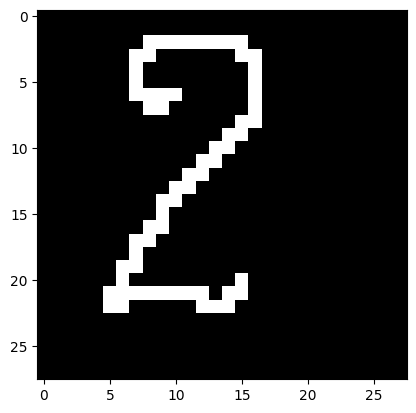

In [75]:
plt.imshow(test_data[252].reshape((28,28)) ,cmap = "gray") #28 arays of 28 characters

In [76]:
test_numbers = []
for i in range(10):
    for j in range(100):
        test_numbers.append(i)

In [67]:
# clf = pickle.load(open("../cutom_svm.sav", 'rb'))

In [77]:
clf = svm.SVC()

In [78]:
clf.fit(test_data, test_numbers)

SVC()

In [79]:
predicted = clf.predict(test_data)

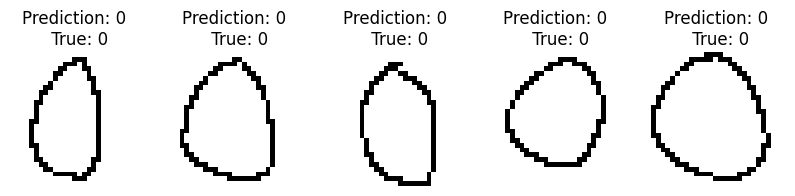

In [83]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction, label in zip(axes, test_data[37:42], predicted[37:42], test_numbers[37:42]):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction} \n True: {label}")
#showing results

In [84]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(test_numbers, predicted)}\n"
)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.97      1.00      0.99       100
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00       100
           4       1.00      0.98      0.99       100
           5       1.00      0.99      0.99       100
           6       1.00      1.00      1.00       100
           7       1.00      1.00      1.00       100
           8       1.00      1.00      1.00       100
           9       1.00      1.00      1.00       100

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000




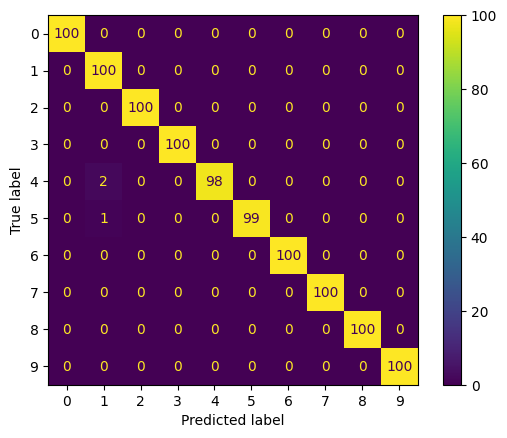

In [85]:
con_matrix = confusion_matrix(test_numbers, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix)
disp.plot()

In [86]:
pickle.dump(clf, open("cutom_svm.sav", 'wb'))